# Avazu - Click-Through Rate Prediction

Julia Kang - jkang613@gmail.com - AMLI 2019 - Mills College

In [26]:
import pandas as pd
import numpy as np
import multiprocessing as mp
import random
import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
# from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from math import sqrt #for RMSE


## Model: Simple Logistic Regression 

In [35]:
# raw_df = pd.read_csv('numeric_rand_sample.csv')
raw_df = pd.read_csv('numeric_rand_sample.csv')
raw_df = raw_df.drop('Unnamed: 0', axis = 1) 

raw_df.head() #ad id is unique to each row
# len(sub_df)

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,time,device_type_a,device_type_b,device_type_c,device_type_d,device_type_e,device_conn_type_a,device_conn_type_b,device_conn_type_c,device_conn_type_d
0,0,1005,0,755,1712,3,2129,65,0,43137,...,0,0,1,0,0,0,1,0,0,0
1,1,1005,0,263,2056,1,2129,65,0,43137,...,0,0,1,0,0,0,1,0,0,0
2,0,1002,0,2052,1680,5,2129,65,0,30034,...,0,1,0,0,0,0,1,0,0,0
3,0,1005,0,263,2056,1,2129,65,0,43137,...,0,0,1,0,0,0,1,0,0,0
4,0,1005,0,263,2056,1,2129,65,0,43137,...,0,0,1,0,0,0,1,0,0,0


In [31]:
FEATURES = []

for col in raw_df.columns:
    if np.issubdtype(raw_df[col].dtypes , np.number):
        FEATURES.append(col)

TARGET = 'click'

In [32]:
# split the data into test and train
train, test  = train_test_split(
  raw_df,                        # split our digits dataframe
  stratify=raw_df[TARGET],       # stratify by the 'click' column   
  test_size=0.2,                # 20% of the data should be held for testing
  random_state=42               # hard-coded random state for repeatability in the example
)

train.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,C15,C16,C17,C18,C19,C20,C21,new_date,new_time,day_of_week
242327,17016179924101047753,0,14102704,1005,0,85f751fd,c4e18dd6,50e219e0,febd1138,82e27996,...,320,50,2480,3,297,100111,61,2014-10-27,04:00:00,0
274613,13362092218668200074,1,14102803,1005,1,d9750ee7,98572c79,f028772b,ecad2386,7801e8d9,...,320,50,1993,2,1063,-1,33,2014-10-28,03:00:00,1
323457,11914295786743937713,0,14102900,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,320,50,2616,0,35,-1,51,2014-10-29,00:00:00,2
275743,12379328275205309290,0,14102804,1005,1,5ee41ff2,17d996e6,f028772b,ecad2386,7801e8d9,...,320,50,2528,0,39,100081,221,2014-10-28,04:00:00,1
394154,15603282462457099589,0,14103016,1005,1,222acd54,de0f0f82,f028772b,ecad2386,7801e8d9,...,320,50,2227,0,935,100075,48,2014-10-30,16:00:00,3


In [33]:
# Start of LogisticRegression Model!!

model = LogisticRegression()
model.fit(train[FEATURES], train[TARGET]) #**** Make sure we are using the properly encoded features ***
# Seeing how our model performs on the SAME TRAINING DATA
predictions = model.predict(test[FEATURES])

In [34]:
#*******metrics******

cnf_matrix = metrics.confusion_matrix(test[TARGET], predictions)
print(cnf_matrix)
print()
print("Accuracy:", metrics.accuracy_score(test[TARGET], predictions))
print("Precision:", metrics.precision_score(test[TARGET], predictions))
print("Recall:", metrics.recall_score(test[TARGET], predictions))
print("Log Loss:", metrics.log_loss(test[TARGET], predictions))

[[67133     0]
 [13749     0]]

Accuracy: 0.8300116218688954
Precision: 0.0
Recall: 0.0
Log Loss: 5.871190582003747


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


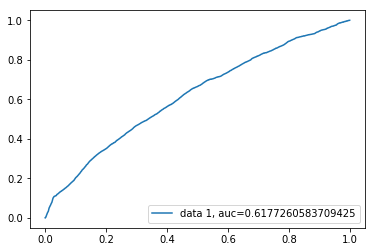

In [27]:
#ROC Curve

y_pred_proba = model.predict_proba(test[FEATURES])[::,1]
fpr, tpr, _ = metrics.roc_curve(test[TARGET],  y_pred_proba)
auc = metrics.roc_auc_score(test[TARGET], y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

**Summary:** Yikes...